In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_csv_data = pd.read_csv('./input/013 IndexE8.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [4]:
df_comp['market_value'] = df_comp.ftse

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df,df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### The ACF

Text(0.5, 1.0, 'ACF for Prices')

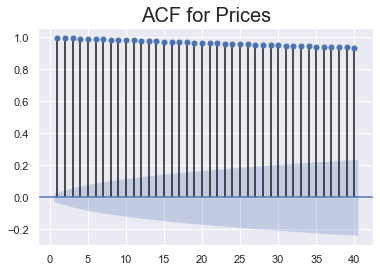

In [11]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices",size = 20)

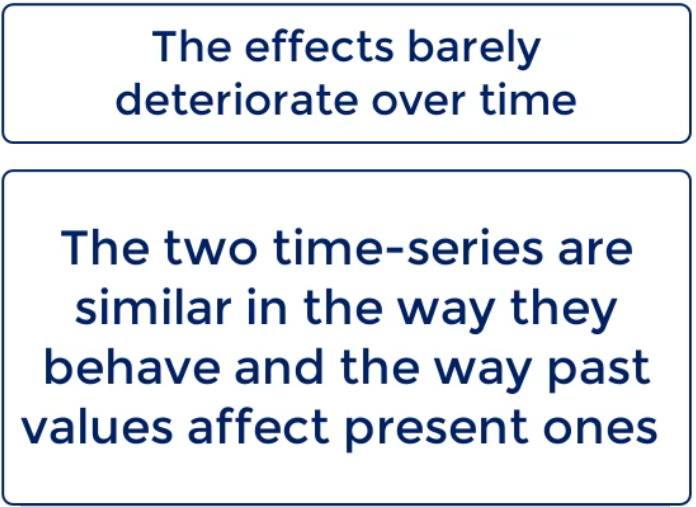

### The PACF

Text(0.5, 1.0, 'PACF for Prices')

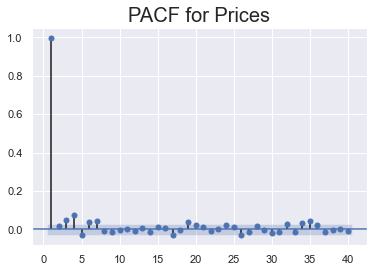

In [10]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = 'ols')
plt.title("PACF for Prices", size = 20)

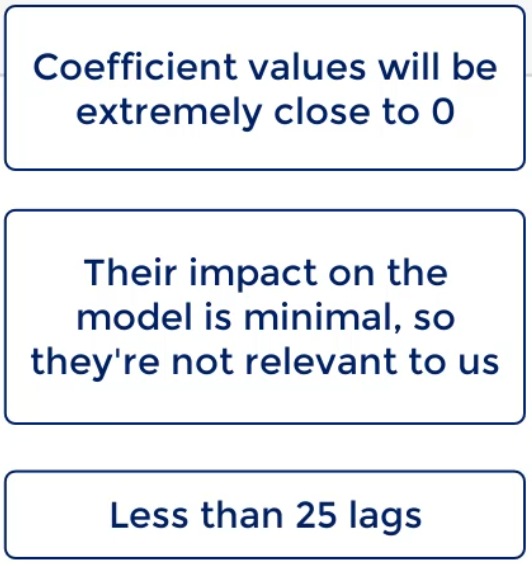

### The AR(1) Model

In [18]:
model_ar = ARMA(df.market_value, order = (1,0))
#order = (number of past values, residual values)

In [19]:
results_ar = model_ar.fit()

In [21]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Sun, 10 May 2020   AIC                          55251.195
Time:                        08:54:54   BIC                          55270.760
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5049.0541    486.267     10.383      0.000    4095.988    6002.120
ar.L1.market_value     0.9985      0.001   1298.750      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

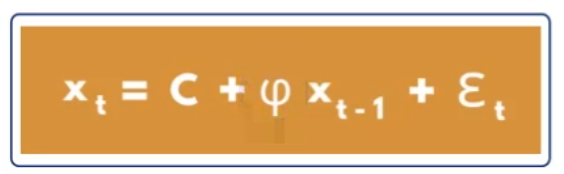

* C = 5049.0541
* & = 0.9985
* std err: how far away, on average, the models predictions  are from the true values
* since the p-val (P>|z|) is zero for both c and & we can say they significant different from zero
* for [0.025 0.975]: if 0 (zero) is not a part of it, we can confirm the coefficients are significant

* <b>since both coefficients (p-val) significant different from zero we can try more complex model</b>

### Higher-Lag AR Models

In [23]:
model_ar_2 = ARMA(df.market_value, order = (2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Sun, 10 May 2020   AIC                          55251.742
Time:                        09:07:59   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6393    495.674     10.268      0.000    4118.136    6061.142
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4632           +0.0000j           58.4632            0.5000
-----------------------------------------------------------------------------
"""

0.226 > 0.05 (5%) => 

we can reject the null hypotesis => 

the coefficient for the second lag isnt significantly different from zero => 

we can assume its equal to zero =>

the price of 2 days ago doest affect the price of today

In [24]:
model_ar_3 = ARMA(df.market_value, order = (3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.871
Method:                       css-mle   S.D. of innovations             59.178
Date:                Sun, 10 May 2020   AIC                          55241.742
Time:                        09:13:50   BIC                          55274.349
Sample:                    01-07-1994   HQIC                         55253.168
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    520.354      9.781      0.000    4069.767    6109.516
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1850           -4.5161j            4.5199           -0.2565
AR.3           -0.1850           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

In [26]:
model_ar_4 = ARMA(df.market_value, order = (4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Sun, 10 May 2020   AIC                          55217.130
Time:                        09:14:05   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6409    559.981      9.089      0.000    3992.098    6187.184
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

#### We prefer Higher Log-Likelihood and Lower information criterion (AIC BIC HQIC)

### LLR Test

In [30]:
# DF: degree of freedom
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf # extracts Log-Lielihood
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1)) # compute test statistics
    p = chi2.sf(LR, DF).round(3) # calculate p-value
    return p

### Comparing Higher-Lag AR Models

In [31]:
LLR_test(model_ar_2,model_ar_3)

0.001

<b> We can see that the difference between Log_Likelihood is significant (using 5% significant) </b>

In [32]:
LLR_test(model_ar_3,model_ar_4)

0.0

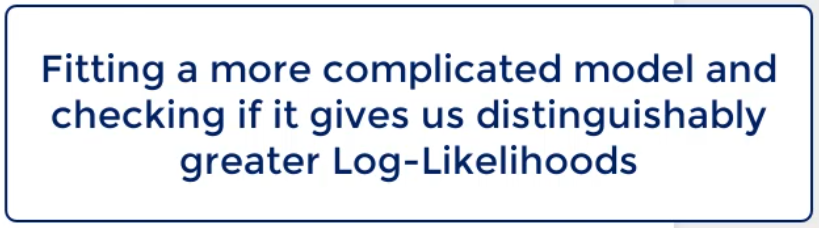

#### Repeat unitl:
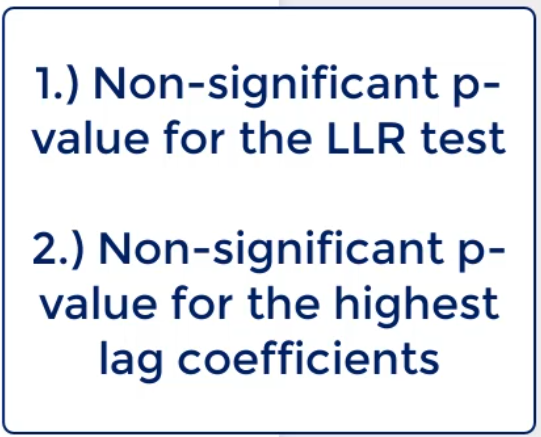

In [39]:
model_ar_5 = ARMA(df.market_value, order = (5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print(f"\nLLR test p-value = {LLR_test(model_ar_4,model_ar_5)}")
model_ar_6 = ARMA(df.market_value, order = (6,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print(f"\nLLR test p-value = {LLR_test(model_ar_5,model_ar_6)}")

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.348
Method:                       css-mle   S.D. of innovations             58.996
Date:                Sun, 10 May 2020   AIC                          55214.697
Time:                        09:36:56   BIC                          55260.346
Sample:                    01-07-1994   HQIC                         55230.693
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    543.555      9.364      0.000    4024.293    6154.989
ar.L1.market_value     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.market_value  

In [37]:
model_ar_7 = ARMA(df.market_value, order = (7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print(f"\nLLR test p-value = {LLR_test(model_ar_6,model_ar_7)}")

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Sun, 10 May 2020   AIC                          55201.799
Time:                        09:32:33   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    589.550      8.633      0.000    3934.144    6245.139
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value  

In [38]:
model_ar_8 = ARMA(df.market_value, order = (8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print(f"\nLLR test p-value = {LLR_test(model_ar_7,model_ar_8)}")

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Sun, 10 May 2020   AIC                          55203.478
Time:                        09:32:38   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    584.901      8.702      0.000    3943.257    6236.025
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value  

We can see that the p-val for the last (8) lag is insignificant and the LLR-test = 0.571

it is indicates that including data from 8 periods ago doesnt improve the model

In [40]:
print(f'LLR test {LLR_test(model_ar, model_ar_7, DF=6 )}')

LLR test 0.0


The null hypothesis is that the term is not significantly different from 0, which indicates that no association exists between the term and the response


<b>P-value ≤ α (0.05): The term is statistically significant</b>


If the p-value is less than or equal to the significance level, you can conclude that the coefficient is statistically significant.


<b>P-value > α (0.05): The term is not statistically significant</b>


If the p-value is greater than the significance level, you cannot conclude that the coefficient is statistically significant. You may want to refit the model without the term.